In [2]:
library(dplyr)
library(stringr)
library(ggplot2)
#install.packages('GGally')
library(GGally)


다음의 패키지를 부착합니다: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
"non-uniform 'Rounding' sampler used"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### 서울 지하수유출량데이터 불러오기

In [3]:
outflow_subway <- read.csv('C:\\Users\\user\\Desktop\\case2\\outflow_subway_seoul.csv')
str(outflow_subway)

'data.frame':	613 obs. of  9 variables:
 $ 관리기관           : chr  "한국철도공사" "서울메트로" "서울메트로" "서울9호선운영㈜" ...
 $ 호선               : chr  "분당선" "2호선" "3호선" "9호선" ...
 $ 역명               : chr  "강남구청역" "신도림" "경찰병원" "염창" ...
 $ 구분               : chr  "#6번" "역사" "역사(시점)" "역사" ...
 $ 조사년도           : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ 분기               : chr  "상반기" "상반기" "상반기" "상반기" ...
 $ 조사기간           : int  181 181 181 181 181 181 184 184 184 184 ...
 $ 총발생량.톤.       : chr  "4" "18" "18" "18" ...
 $ 일평균발생량.톤.일.: num  0.02 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...


### '역'으로 끝나는 역명의 '역'글자를 제거

In [4]:
outflow_subway$역명 <- gsub('역$','', outflow_subway$역명)
bonseon<- as.data.frame(str_split_fixed(outflow_subway$역명,'본선',2))
outflow_subway$역명 <- bonseon$V1
head(outflow_subway)

,관리기관,호선,역명,구분,조사년도,분기,조사기간,총발생량.톤.,일평균발생량.톤.일.
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
1,한국철도공사,분당선,강남구청,#6번,2020,상반기,181,4,0.02
2,서울메트로,2호선,신도림,역사,2020,상반기,181,18,0.10
3,서울메트로,3호선,경찰병원,역사(시점),2020,상반기,181,18,0.10
4,서울9호선운영㈜,9호선,염창,역사,2020,상반기,181,18,0.10
5,서울9호선운영㈜,9호선,국회의사당,역사,2020,상반기,181,18,0.10
6,서울9호선운영㈜,9호선,중앙보훈병원,역사,2020,상반기,181,18,0.10


### 정규식을 이용한 역명 변환 및 좌표데이터 병합

In [5]:
#모든 특수문자 제거 
outflow_subway$역명 <- gsub("[[:punct:]]", '', outflow_subway$역명)
#'환승'단어 제거
outflow_subway$역명 <- gsub("환승", '', outflow_subway$역명)

outflow_subway <- outflow_subway%>%group_by(역명)%>%
  summarise(a = sum(일평균발생량.톤.일.))%>%
  filter(a >= 300)

nrow(outflow_subway)
head(outflow_subway)

#유출지하수량이 300이 넘는 역들의 좌표를 얻기 위해 역좌표데이터을 조인하자.
seoul_subway <- read.csv('C:\\Users\\user\\Desktop\\case2\\전국도시철도역사정보표준데이터.csv')

seoul_subway <- seoul_subway[str_detect(seoul_subway$역사도로명주소, '서울'),]

seoul_subway$역사명

seoul_subway$역사명 <- gsub('역$','', seoul_subway$역사명)

#seoul_subway도 문자전처리하자

#'역사명'컬럼을 '역명'으로 변경
seoul_subway <- seoul_subway%>%rename('역명' = '역사명')
str(seoul_subway)
head(seoul_subway)


subway300 <- left_join(outflow_subway, seoul_subway, by = '역명')
nrow(subway300)

[1] 106

역명,a
<chr>,<dbl>
PIT1,1259.86
PIT2,5440.80
PIT3,854.66
PIT5,7289.90
가락시장,1270.70
가산디지털,393.00


[1] "동대문역사문화공원" "신당"               "상왕십리"          
  [4] "왕십리"             "한양대"             "뚝섬"              
  [7] "성수"               "건대입구"           "구의"              
 [10] "강변"               "잠실나루"           "잠실"              
 [13] "서울역"             "시청"               "종각"              
 [16] "종로3가"            "종로5가"            "서울역(경의선)"    
 [19] "신촌역"             "가좌역"             "효창공원앞역"      
 [22] "공덕역"             "서강대역"           "홍대입구역"        
 [25] "디지털미디어시티역" "수색역"             "왕십리역"          
 [28] "청량리역"           "회기역"             "외대앞역"          
 [31] "신이문역"           "석계역"             "광운대역"          
 [34] "월계역"             "녹천역"             "창동역"            
 [37] "방학역"             "도봉역"             "도봉산역"          
 [40] "중랑역"             "상봉역"             "망우역"            
 [43] "양원역"             "서울숲역"           "압구정로데오역"    
 [46] "강남구청역"         "선정릉역"           "선릉역"            
 [49] "한티역"             "도곡역"             "구룡역"            
 [52] "개포동역"           "대모산입구역"       "수서역"            
 [55] "신내역"             "구일역"             "개봉역"            
 [58] "오류동역"           "온수역"             "남영역"            
 [61] "용산역"             "이촌역"             "서빙고역"          
 [64] "한남역"             "노량진역"           "대방역"            
 [67] "신길역"             "영등포역"           "신도림역"          
 [70] "구로역"             "가산디지털단지역"   "독산역"            
 [73] "금천구청역"         "옥수역"             "응봉역"            
 [76] "김포공항역"         "동대문"             "신설동"            
 [79] "제기동"             "청량리"             "동묘앞"            
 [82] "까치산"             "시청"               "을지로입구"        
 [85] "을지로3가"          "을지로4가"          "잠실새내"          
 [88] "종합운동장"         "삼성"               "선릉"              
 [91] "역삼"               "강남"               "교대"              
 [94] "서초"               "방배"               "사당"              
 [97] "낙성대"             "서울대입구"         "봉천"              
[100] "신림"               "신대방"             "구로디지털단지"    
[103] "대림"               "신도림"             "문래"              
[106] "영등포구청"         "당산"               "마장"              
[109] "합정"               "홍대입구"           "신촌"              
[112] "이대"               "아현"               "충정로"            
[115] "용답"               "신답"               "신설동"            
[118] "도림천"             "양천구청"           "신정네거리"        
[121] "용두"               "구파발"             "연신내"            
[124] "불광"               "녹번"               "홍제"              
[127] "무악재"             "독립문"             "경복궁"            
[130] "안국"               "종로3가"            "을지로3가"         
[133] "충무로"             "동대입구"           "약수"              
[136] "금호"               "옥수"               "압구정"            
[139] "신사"               "잠원"               "고속터미널"        
[142] "교대"               "남부터미널"         "양재"              
[145] "매봉"               "도곡"               "대치"              
[148] "학여울"             "대청"               "일원"              
[151] "수서"               "가락시장"           "경찰병원"          
[154] "오금"               "당고개"             "상계"              
[157] "노원"               "창동"               "쌍문"              
[160] "수유"               "미아"               "미아사거리"        
[163] "길음"               "성신여대입구"       "한성대입구"        
[166] "혜화"               "동대문"             "동대문역사문화공원"
[169] "충무로"             "명동"               "회현"              
[172] "서울역"             "숙대입구"           "삼각지"            
[175] "신용산"             "이촌"               "동작"              
[178] "총신대입구"         "사당"               "남태령"            
[181] "방화"               "개화산"             "김포공항"          
[184] "송정"               "마곡"               "발산"              
[187] "우장산"             "화곡"               "까치산"            
[190] "신정"               "목동"               "오목교"            
[193] "양평"               "영등포구청"         "영등포시장"        
[196] "신길"               "여의도"             "여의나루"          
[199] "마포"               "공덕"               "애오개"            
[202] "충정로"    

'data.frame':	332 obs. of  11 variables:
 $ 역번호        : chr  "205" "206" "207" "208" ...
 $ 역명          : chr  "동대문역사문화공원" "신당" "상왕십리" "왕십리" ...
 $ 노선번호      : chr  "S1102" "S1102" "S1102" "S1102" ...
 $ 노선명        : chr  "서울 도시철도 2호선" "서울 도시철도 2호선" "서울 도시철도 2호선" "서울 도시철도 2호선" ...
 $ 환승역구분    : chr  "환승역" "환승역" "일반역" "환승역" ...
 $ 환승노선번호  : chr  "S1104+S1105" "S1106" "" "S1105+I4105+I4107" ...
 $ 환승노선명    : chr  "서울 도시철도 4호선+서울 도시철도 5호선" "서울 도시철도 6호선" "" "서울 도시철도 5호선+분당선+경의중앙선" ...
 $ 역위도        : num  37.6 37.6 37.6 37.6 37.6 ...
 $ 역경도        : num  127 127 127 127 127 ...
 $ 운영기관명    : chr  "서울교통공사" "서울교통공사" "서울교통공사" "서울교통공사" ...
 $ 역사도로명주소: chr  "서울특별시 중구 을지로 지하 279 (을지로7가)" "서울특별시 중구 퇴계로 지하 431-1 (신당동)" "서울특별시 성동구 왕십리로 지하 374 (하왕십리동)" "서울특별시 성동구 왕십리로 지하300(행당동)" ...


,역번호,역명,노선번호,노선명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
24,205,동대문역사문화공원,S1102,서울 도시철도 2호선,환승역,S1104+S1105,서울 도시철도 4호선+서울 도시철도 5호선,37.56500,127.0074,서울교통공사,서울특별시 중구 을지로 지하 279 (을지로7가)
25,206,신당,S1102,서울 도시철도 2호선,환승역,S1106,서울 도시철도 6호선,37.56583,127.0181,서울교통공사,서울특별시 중구 퇴계로 지하 431-1 (신당동)
26,207,상왕십리,S1102,서울 도시철도 2호선,일반역,,,37.56417,127.0294,서울교통공사,서울특별시 성동구 왕십리로 지하 374 (하왕십리동)
27,208,왕십리,S1102,서울 도시철도 2호선,환승역,S1105+I4105+I4107,서울 도시철도 5호선+분당선+경의중앙선,37.56153,127.0375,서울교통공사,서울특별시 성동구 왕십리로 지하300(행당동)
28,209,한양대,S1102,서울 도시철도 2호선,일반역,,,37.55522,127.0435,서울교통공사,서울특별시 성동구 왕십리로 206 (행당동)
29,210,뚝섬,S1102,서울 도시철도 2호선,일반역,,,37.54712,127.0474,서울교통공사,서울특별시 성동구 아차산로 18 (성수동1가)


[1] 139

### 좌표가 없는 데이터 제거

In [6]:
#역위도나 역경도가 없는 데이터를 삭제하자
subway300 <- subway300 %>% filter(!is.na(역경도) == T | !is.na(역위도) == T)
sum(is.na(subway300))
nrow(subway300)

table(subway300$역명)
unique(subway300$역명)

#중복되는 역에 대해서 300t이상의 일평균 유출지하수량을 평균화 
subway300 <- subway300 %>% group_by(역명) %>% summarise(mean_300flow = mean(a))

write.csv(subway300, 'C:\\Users\\user\\Desktop\\case2\\subway_only300.csv')

[1] 0

[1] 124


          가락시장             개포동               거여             경복궁 
                 2                  1                  1                  1 
          경찰병원               고덕             고려대         고속터미널 
                 1                  1                  1                  2 
              공덕               공릉             광나루             광화문 
                 3                  1                  1                  1 
            광흥창               구룡               구산               군자 
                 1                  1                  1                  2 
          굽은다리               길동               길음             남구로 
                 1                  1                  1                  1 
            남태령               노원             답십리               대림 
                 1                  2                  1                  2 
        대모산입구               대청               대치               도곡 
                 1                  1                  1                  2

[1] "가락시장"           "개포동"             "거여"              
 [4] "경복궁"             "경찰병원"           "고덕"              
 [7] "고려대"             "고속터미널"         "공덕"              
[10] "공릉"               "광나루"             "광화문"            
[13] "광흥창"             "구룡"               "구산"              
[16] "군자"               "굽은다리"           "길동"              
[19] "길음"               "남구로"             "남태령"            
[22] "노원"               "답십리"             "대림"              
[25] "대모산입구"         "대청"               "대치"              
[28] "도곡"               "도림천"             "도봉산"            
[31] "독립문"             "동대문역사문화공원" "동대입구"          
[34] "동묘앞"             "동작"               "마곡"              
[37] "마들"               "마장"               "마천"              
[40] "마포"               "면목"               "명일"              
[43] "몽촌토성"           "방배"               "보문"              
[46] "복정"               "불광"               "사가정"            
[49] "사당"               "삼각지"             "삼성중앙"          
[52] "상도"               "서울"               "서울숲"            
[55] "성신여대입구"       "수서"               "시청"              
[58] "신대방삼거리"       "신설동"             "아현"              
[61] "압구정로데오"       "애오개"             "약수"              
[64] "양평"               "언주"               "여의나루"          
[67] "여의도"             "역촌"               "연신내"            
[70] "영등포시장"         "오금"               "온수"              
[73] "왕십리"             "을지로3가"          "을지로4가"         
[76] "응암"               "이수"               "장승배기"          
[79] "장한평"             "종로3가"            "종합운동장"        
[82] "중계"               "중화"               "천호"              
[85] "충무로"             "태릉입구"           "하계"              
[88] "한티"               "행당"               "혜화"              
[91] "홍제"

### 동별 취약인구 데이터 전처리

In [7]:
#불러오기
dong<- read.csv('C:\\Users\\user\\Desktop\\case2\\서울 동 QGIS파일\\dong.csv', encoding = 'UTF-8')
head(dong)

weakp<- read.csv('C:\\Users\\user\\Desktop\\case2\\동별 취약인구\\동별취약인구.csv')
head(weakp)

#주소 전처리
#동 단위만 추출하자
weakp_dong_split<- str_split_fixed(weakp$행정구역, ' ', 3)
weakp_dong_split<- as.data.frame(weakp_dong_split)[3]
weakp_dong_split<- weakp_dong_split%>%rename(name= V3)           
weakp_dong_split<- cbind(weakp_dong_split,  총인구수= weakp$총인구수)
weakp_dong_split<- cbind(weakp_dong_split,  취약인구 = weakp$취약인구)

head(weakp_dong_split)

#동명 차이 보기
setdiff(weakp_dong_split$name, dong$name)


#한 데이터 중간에 '제n동'패턴이 존재하여 이름이 서로 다름. 정규식을 활용하여 동이름을 맞춰주자 

#문자 사이에 '제'가 존재하는 데이터 확인
weakp_dong_split[str_detect(weakp_dong_split$name,'(제)'),]
dong[str_detect(dong$name, '(제)'),]

#제라고 들어가있는 동을 바꿔보자

weakp_dong_split[str_detect(weakp_dong_split$name, '(제)'),]


je<- str_split_fixed(weakp_dong_split$name, '(제)', 2)

je<- as.data.frame(je)

je<- paste0(je$V1, je$V2)

#중간 확인
setdiff(je, dong$name)

#특수문자를 제거해주자.
je<- gsub("[\\$.@]", '/', je)

#잘 표준화된 것을 확인 (홍제동 제외)
je[str_detect(je, '제')]

#대입
weakp_dong_split$name<- je

dong$name<- gsub("[\\$.·@]", '/', dong$name)

#최종적으로 한 쪽 데이터에만 존재하는 동만을 확인
#취약인구에 대한 동을 기준으로 조인하기에 없는 거나 마찬가지 
setdiff(weakp_dong_split$name, dong$name)

#같은 동명을 기준으로 이너조인
total_weakp<- left_join(weakp_dong_split, dong, by = 'name')

str(total_weakp)

#완성된 취약인구에 대한 데이터 저장
write.csv(total_weakp, 'C:\\Users\\user\\Desktop\\case2\\동별 취약인구\\total_weakp.csv')

nrow(total_weakp)

View(total_weakp)

,code,name,name_eng,면적
,<int>,<chr>,<chr>,<dbl>
1,1125074,길동,Gil-dong,1.596
2,1125073,천호2동,Cheonho 2-dong,1.830
3,1125072,암사1동,Amsa 1-dong,0.735
4,1125071,둔촌2동,Dunchon 2-dong,1.588
5,1125070,둔촌1동,Dunchon 1-dong,0.895
6,1125067,성내3동,Seongnae 3-dong,0.644


,X,행정구역,총인구수,취약인구
,<int>,<chr>,<chr>,<int>
1,1,서울특별시 중구 소공동,"2,069",413
2,2,서울특별시 중구 회현동,"5,136",1682
3,3,서울특별시 중구 명동,"2,914",828
4,4,서울특별시 중구 필동,"4,034",1055
5,5,서울특별시 중구 장충동,"4,664",1020
6,6,서울특별시 중구 광희동,"5,224",1330


,name,총인구수,취약인구
,<chr>,<chr>,<int>
1,소공동,"2,069",413
2,회현동,"5,136",1682
3,명동,"2,914",828
4,필동,"4,034",1055
5,장충동,"4,664",1020
6,광희동,"5,224",1330


[1] "신당동"          "다산동"          "약수동"          "청구동"         
  [5] "신당제5동"       "동화동"          "공릉1동"         "중계2.3동"      
  [9] "상계3.4동"       "상계6.7동"       "불광제1동"       "불광제2동"      
 [13] "갈현제1동"       "갈현제2동"       "응암제1동"       "응암제2동"      
 [17] "응암제3동"       "신사제1동"       "신사제2동"       "홍제제1동"      
 [21] "홍제제3동"       "홍제제2동"       "홍은제1동"       "홍은제2동"      
 [25] "남가좌제1동"     "남가좌제2동"     "북가좌제1동"     "북가좌제2동"    
 [29] "망원제1동"       "망원제2동"       "성산제1동"       "성산제2동"      
 [33] "등촌제1동"       "등촌제2동"       "등촌제3동"       "화곡제1동"      
 [37] "화곡제2동"       "화곡제3동"       "화곡제4동"       "화곡제6동"      
 [41] "화곡제8동"       "가양제1동"       "가양제2동"       "가양제3동"      
 [45] "발산제1동"       "방화제1동"       "방화제2동"       "방화제3동"      
 [49] "구로제1동"       "구로제2동"       "구로제3동"       "구로제4동"      
 [53] "구로제5동"       "고척제1동"       "고척제2동"       "개봉제1동"      
 [57] "개봉제2동"       "개봉제3동"       "오류제1동"       "오류제2동"      
 [61] "항동"            "독산제1동"       "독산제2동"       "독산제3동"      
 [65] "독산제4동"       "시흥제1동"       "시흥제2동"       "시흥제3동"      
 [69] "시흥제4동"       "시흥제5동"       "당산제1동"       "당산제2동"      
 [73] "양평제1동"       "양평제2동"       "신길제1동"       "신길제3동"      
 [77] "신길제4동"       "신길제5동"       "신길제6동"       "신길제7동"      
 [81] "대림제1동"       "대림제2동"       "대림제3동"       "노량진제1동"    
 [85] "노량진제2동"     "상도제1동"       "상도제2동"       "상도제3동"      
 [89] "상도제4동"       "사당제1동"       "사당제2동"       "사당제3동"      
 [93] "사당제4동"       "사당제5동"       "신대방제1동"     "신대방제2동"    
 [97] "원효로제1동"     "원효로제2동"     "이촌제1동"       "이촌제2동"      
[101] "이태원제1동"     "이태원제2동"     "위례동"          "명일제1동"      
[105] "명일제2동"       "고덕제1동"       "고덕제2동"       "암사제1동"      
[109] "암사제2동"       "암사제3동"       "천호제1동"       "천호제2동"      
[113] "천호제3동"       "성내제1동"       "성내제2동"       "성내제3동"      
[117] "둔촌제1동"       "둔촌제2동"       "왕십리제2동"     "행당제1동"      
[121] "행당제2동"       "금호2.3가동"     "성수1가제1동"    "성수1가제2동"   
[125] "성수2가제1동"    "성수2가제3동"    "중곡제1동"       "중곡제2동"      
[129] "중곡제3동"       "중곡제4동"       "자양제1동"       "자양제2동"      
[133] "자양제3동"       "자양제4동"       "구의제1동"       "구의제2동"      
[137] "구의제3동"       "전농제1동"       "전농제2동"       "답십리제1동"    
[141] "답십리제2동"     "장안제1동"       "장안제2동"       "휘경제1동"      
[145] "휘경제2동"       "이문제1동"       "이문제2동"       "면목제2동"      
[149] "면목제4동"       "면목제5동"       "면목제7동"       "면목제3.8동"    
[153] "상봉제1동"       "상봉제2동"       "중화제1동"       "중화제2동"      
[157] "묵제1동"         "묵제2동"         "망우제3동"       "돈암제1동"      
[161] "돈암제2동"       "정릉제1동"       "정릉제2동"       "정릉제3동"      
[165] "정릉제4동"       "길음제1동"       "길음제2동"       "월곡제1동"      
[169] "월곡제2동"       "장위제1동"       "장위제2동"       "장위제3동"      
[173] "창제1동"         "창제2동"         "창제3동"         "창제4동"        
[177] "창제5동"         "도봉제1동"       "도봉제2동"       "쌍문제1동"      
[181] "쌍문제2동"       "쌍문제3동"       "쌍문제4동"       "방학제1동"      
[185] "방학제2동"       "방학제3동"       "종로1.2.3.4가동" "종로5.6가동"    
[189] "창신제1동"       "창신제2동"       "창신제3동"       "숭인제1동"      
[193] "숭인제2동"

,name,총인구수,취약인구
,<chr>,<chr>,<int>
12,신당제5동,"10,527",2348
36,불광제1동,"39,733",10073
37,불광제2동,"28,441",7003
38,갈현제1동,"23,167",5386
39,갈현제2동,"28,885",6465
42,응암제1동,"30,963",7051
43,응암제2동,"27,569",7018
44,응암제3동,"25,218",6586
46,신사제1동,"27,547",6438


,code,name,name_eng,면적
,<int>,<chr>,<chr>,<dbl>
228,1113065,홍제2동,Hongje 2-dong,0.703
229,1113064,홍제3동,Hongje 3-dong,1.094
230,1113062,홍제1동,Hongje 1-dong,1.495
338,1106082,제기동,Jegi-dong,1.186


,name,총인구수,취약인구
,<chr>,<chr>,<int>
12,신당제5동,"10,527",2348
36,불광제1동,"39,733",10073
37,불광제2동,"28,441",7003
38,갈현제1동,"23,167",5386
39,갈현제2동,"28,885",6465
42,응암제1동,"30,963",7051
43,응암제2동,"27,569",7018
44,응암제3동,"25,218",6586
46,신사제1동,"27,547",6438


[1] "신당동"          "다산동"          "약수동"          "청구동"         
 [5] "동화동"          "공릉1동"         "중계2.3동"       "상계3.4동"      
 [9] "상계6.7동"       "항동"            "위례동"          "금호2.3가동"    
[13] "기동"            "면목3.8동"       "종로1.2.3.4가동" "종로5.6가동"

[1] "홍제1동" "홍제3동" "홍제2동"

[1] "신당동"  "다산동"  "약수동"  "청구동"  "동화동"  "공릉1동" "항동"   
[8] "위례동"  "기동"

'data.frame':	427 obs. of  6 variables:
 $ name    : chr  "소공동" "회현동" "명동" "필동" ...
 $ 총인구수: chr  "2,069" "5,136" "2,914" "4,034" ...
 $ 취약인구: int  413 1682 828 1055 1020 1330 560 1692 3234 4901 ...
 $ code    : int  1102052 1102054 1102055 1102057 1102058 1102059 1102060 NA NA NA ...
 $ name_eng: chr  "Sogong-dong" "Hoehyeon-dong" "Myeong-dong" "Pil-dong" ...
 $ 면적    : num  0.917 0.916 0.994 1.458 1.021 ...


[1] 427

name,총인구수,취약인구,code,name_eng,면적
<chr>,<chr>,<int>,<int>,<chr>,<dbl>
소공동,"2,069",413,1102052,Sogong-dong,0.917
회현동,"5,136",1682,1102054,Hoehyeon-dong,0.916
명동,"2,914",828,1102055,Myeong-dong,0.994
필동,"4,034",1055,1102057,Pil-dong,1.458
장충동,"4,664",1020,1102058,Jangchung-dong,1.021
광희동,"5,224",1330,1102059,Gwanghui-dong,0.738
을지로동,"1,816",560,1102060,Euljiro-dong,0.621
신당동,"7,692",1692,NA,NA,NA
다산동,"14,243",3234,NA,NA,NA


### 사용 X

In [8]:
########동별 어린이보호구역 카운트###########

list.files()
total_weakp<- read.csv('C:\\Users\\user\\Desktop\\case2\\동별 취약인구\\total_weakp.csv')
str(total_weakp)

total_weakp[str_detect(total_weakp$name, '/'),]


child_sec<- read.csv('C:\\Users\\user\\Desktop\\case2\\동별 어린이보호구역\\어린이보호구역\\동별 어린이보호구역.csv')
head(child_sec)
nrow(child_sec)

#동별 시설에 따른 어린이보호구역 수
child_sec_fac<- child_sec%>%group_by(name, fac_type)%>%summarise(count = n())

table(child_sec_fac$fac_type)

dong_fac1<- child_sec_fac%>%filter(fac_type == '초등학교' | fac_type == '초교')
dong_fac2<- child_sec_fac%>%filter(fac_type == '어린이집')
dong_fac3<- child_sec_fac%>%filter(fac_type == '유치원')
dong_fac4<- child_sec_fac%>%filter(fac_type == '특수학교')

write.csv(dong_fac1, 'C:\\Users\\user\\Desktop\\case2\\동별 어린이보호구역\\동별 초등학교 보호구역.csv')
write.csv(dong_fac2, 'C:\\Users\\user\\Desktop\\case2\\동별 어린이보호구역\\동별 어린이집 보호구역.csv')
write.csv(dong_fac3, 'C:\\Users\\user\\Desktop\\case2\\동별 어린이보호구역\\동별 유치원 보호구역.csv')
write.csv(dong_fac4, 'C:\\Users\\user\\Desktop\\case2\\동별 어린이보호구역\\동별 특수학교 보호구역.csv')

[1] "[서울권-9조]2차 산출물"             "6차선이상도로.csv"                 
 [3] "case2-2.R"                          "case2 코드 부록.docx"              
 [5] "case2.R"                            "case2_final.csv"                   
 [7] "case2_final_top20.csv"              "case2_jjin.csv"                    
 [9] "case2_찐찐최.csv"                   "case2가중치.csv"                   
[11] "crossload300.csv"                   "final.csv"                         
[13] "outflow_subway_seoul.csv"           "seoul_subway_point.csv"            
[15] "subway_only300.csv"                 "subway_only300_real.csv"           
[17] "total_weakp.csv"                    "Untitled.ipynb"                    
[19] "Untitled1.ipynb"                    "구별미세먼지평균.csv"              
[21] "구별평균기온.csv"                   "권역별강분류"                      
[23] "기준역_4326.csv"                    "날씨"                              
[25] "날씨_final"                         "동별 건물"                         
[27] "동별 노유자시설"                    "동별 노인보호구역"                 
[29] "동별 어린이보호구역"                "동별 취약인구"                     
[31] "서울 동 QGIS파일"                   "역버퍼 안 노유자시설"              
[33] "역버퍼 안 노인보호구역"             "역버퍼 안 어린이보호구역"          
[35] "유출지하수 및 도로 부록.docx"       "자치구"                            
[37] "전국도시철도역사정보표준데이터.csv" "회귀분석데이터.csv"

'data.frame':	427 obs. of  7 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name    : chr  "소공동" "회현동" "명동" "필동" ...
 $ 총인구수: chr  "2,069" "5,136" "2,914" "4,034" ...
 $ 취약인구: int  413 1682 828 1055 1020 1330 560 1692 3234 4901 ...
 $ code    : int  1102052 1102054 1102055 1102057 1102058 1102059 1102060 NA NA NA ...
 $ name_eng: chr  "Sogong-dong" "Hoehyeon-dong" "Myeong-dong" "Pil-dong" ...
 $ 면적    : num  0.917 0.916 0.994 1.458 1.021 ...


,X,name,총인구수,취약인구,code,name_eng,면적
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
26,26,중계2/3동,"35,446",9311,1111078,"Junggye 2,3-dong",0.913
29,29,상계3/4동,"27,076",7476,1111076,Sanggye 3.4-dong,5.755
31,31,상계6/7동,"33,509",7355,1111077,Sanggye 6.7-dong,1.436
310,310,금호2/3가동,"23,409",5629,1104072,"Geumho 2,3ga-dong",0.639
353,353,면목3/8동,"25,576",6017,1107072,Myeonmok 3.8-dong,1.364
419,419,종로1/2/3/4가동,"7,256",2143,1101061,Jongno 1·2·3·4-ga-dong,2.429
420,420,종로5/6가동,"5,242",1232,1101063,Jongno 5·6-ga-dong,0.600


,sqeuence,police,gu,fac_name,fac_type,address,point_x,point_y,code,name,면적
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,0,강남경찰서,강남구,성모어린이집,어린이집,서울특별시 강남구 강남대로 124길 65,127.0269,37.51098,1123052,논현1동,1.256
2,0,수서경찰서,수서구,역삼초등학교병설유치원,유치원,서울특별시 강남구 강남대로 66길 21,127.0329,37.49292,1123064,역삼1동,2.360
3,0,수서경찰서,수서구,역삼초등학교,초등학교,서울특별시 강남구 강남대로 66길 21,127.0329,37.49292,1123064,역삼1동,2.360
4,0,강남경찰서,강남구,논현초등학교,초등학교,서울특별시 강남구 강남대로120길 33,127.0260,37.50817,1123052,논현1동,1.256
5,0,수서경찰서,수서구,이화유치원,유치원,서울특별시 강남구 개포로 109길 9,127.0751,37.49575,1123079,대치2동,2.045
6,0,수서경찰서,수서구,강남어린이집,어린이집,서울특별시 강남구 개포로 109길 9,127.0751,37.49575,1123079,대치2동,2.045


[1] 1665

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.




  국제학교   어린이집 외국인학교     유치원       초교   초등학교   특수학교 
         1        246          1        299         18        328         24 
      학원 
         3 

### 동별 어린이 보호구역 수 및 취약인구 통합

In [9]:
#동별 전체 어린이 보호구역 count

child_sec_count<- child_sec%>%group_by(name, code)%>%summarise(count = n())


###동별 어린이보호구역개수와 취약인구수의 상관관계######


#걍 행정동코드로 조인#######
child_sec_count$name<- gsub("[\\$.·@]", '/', child_sec_count$name)

setdiff(total_weakp$name, child_sec_count$name)

total_weakp[str_detect(total_weakp$name, '종로'),]
child_sec_count[str_detect(child_sec_count$name, '종로'),]
##################################################################

setdiff(total_weakp$code, child_sec_count$code)



#행정동코드로 조인
weakp_child_sec<- left_join(total_weakp, child_sec_count, by = 'code')

#안해도됌
weakp_child_sec$count[weakp_child_sec$count == 'NA'] <- 0

#상관관계 테스트
cor.test(weakp_child_sec$취약인구, weakp_child_sec$count)


head(weakp_child_sec)
nrow(weakp_child_sec)

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



[1] "을지로동"        "신당동"          "다산동"          "약수동"         
 [5] "청구동"          "동화동"          "공릉1동"         "남가좌1동"      
 [9] "북가좌1동"       "합정동"          "항동"            "후암동"         
[13] "원효로2동"       "용문동"          "낙성대동"        "남현동"         
[17] "신림동"          "방이2동"         "문정2동"         "위례동"         
[21] "기동"            "면목3/8동"       "월곡2동"         "쌍문3동"        
[25] "삼청동"          "종로1/2/3/4가동" "창신2동"         "숭인2동"

,X,name,총인구수,취약인구,code,name_eng,면적
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
419,419,종로1/2/3/4가동,"7,256",2143,1101061,Jongno 1·2·3·4-ga-dong,2.429
420,420,종로5/6가동,"5,242",1232,1101063,Jongno 5·6-ga-dong,0.600


name,code,count
<chr>,<int>,<int>
종로5/6가동,1101063,1


[1] 1102060      NA 1113069 1113071 1114068 1103051 1103057 1103059 1121058
[10] 1121063 1121069 1124058 1124069 1107072 1108072 1110053 1101054 1101061
[19] 1101068 1101071


	Pearson's product-moment correlation

data:  weakp_child_sec$취약인구 and weakp_child_sec$count
t = 9.3554, df = 397, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3410731 0.5022347
sample estimates:
      cor 
0.4250162 


,X,name.x,총인구수,취약인구,code,name_eng,면적,name.y,count
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>
1,1,소공동,"2,069",413,1102052,Sogong-dong,0.917,소공동,2
2,2,회현동,"5,136",1682,1102054,Hoehyeon-dong,0.916,회현동,4
3,3,명동,"2,914",828,1102055,Myeong-dong,0.994,명동,2
4,4,필동,"4,034",1055,1102057,Pil-dong,1.458,필동,1
5,5,장충동,"4,664",1020,1102058,Jangchung-dong,1.021,장충동,3
6,6,광희동,"5,224",1330,1102059,Gwanghui-dong,0.738,광희동,1


[1] 427

### 동별 노인보호구역 수 및 취약인구 통합

In [10]:
################동별 노인보호구역 카운트#############
grand_sec<- read.csv('C:\\Users\\user\\Desktop\\case2\\동별 노인보호구역\\동별 노인보호구역.csv')

head(grand_sec)

#동별 노인보호구역 수
grand_sec_count<- grand_sec%>%group_by(name)%>%summarise(count = n())


write.csv(grand_sec_count, 'C:\\Users\\user\\Desktop\\case2\\동별 노인보호구역\\동별 노인보호구역 개수.csv')


#####동별 노인보호구역개수와 취약인구수의 상관관계####

grand_sec_count$name<- gsub("[\\$.·@]", '/',grand_sec_count$name)

weakp_grnad_sec<- left_join(total_weakp, grand_sec_count, by = 'name')

#상관관계 테스트
cor.test(weakp_grnad_sec$취약인구, weakp_grnad_sec$count)

,시설명,위치,name
,<chr>,<chr>,<chr>
1,종로노인종합복지관,종로구 이화동 25-1,이화동
2,묵정경로당,중구 충무로5가 21,광희동
3,용산노인종합복지관,용산구 한남동 108,한남동
4,성동노인종합복지관,성동구 마장동 798-1,마장동
5,시립동부노인전문요양센터,성동구 홍익동 16-1,왕십리도선동
6,광진노인종합복지관,광진구 군자동 364-15,군자동



	Pearson's product-moment correlation

data:  weakp_grnad_sec$취약인구 and weakp_grnad_sec$count
t = -0.72971, df = 111, p-value = 0.4671
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2506263  0.1171293
sample estimates:
        cor 
-0.06909552 


### 동별 노유자 시설 수 및 취약인구 통합

'data.frame':	2963 obs. of  8 variables:
 $ 법정동명  : chr  "서울특별시 종로구 청운동" "서울특별시 종로구 청운동" "서울특별시 종로구 신교동" "서울특별시 종로구 신교동" ...
 $ 건물명    : chr  "청운 어린이집" "청운실버센터" "청운경로당" "종로구 장애인복지관 및 푸르메재활센터" ...
 $ 주요용도명: chr  "노유자시설" "노유자시설" "노유자시설" "노유자시설" ...
 $ 세부용도명: chr  "영유아보육시설" "노인복지시설" "노인복지시설" "사회복지시설" ...
 $ X         : num  127 127 127 127 127 ...
 $ Y         : num  37.6 37.6 37.6 37.6 37.6 ...
 $ code      : int  1101072 1101072 1101072 1101072 1101072 1101072 1101072 1101053 1101061 1101061 ...
 $ name      : chr  "청운효자동" "청운효자동" "청운효자동" "청운효자동" ...



         골프연습장        근로복지시설      기타노유자시설    기타아동관련시설 
                  1                  10                 203                 221 
기타제1종근생활시설          노유자시설        노인복지시설              독서실 
                  2                  77                 856                   2 
           복리시설        사회복지시설        생활편익시설              소매점 
                  1                 215                   1                   1 
       아동관련시설        아동복지시설            어린이집      영유아보육시설 
                  2                  66                 653                 503 
             유치원                학원 
                147                   2 

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.




	Pearson's product-moment correlation

data:  weakp_noyou$count and weakp_noyou$취약인구
t = 9.975, df = 407, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3618090 0.5179313
sample estimates:
     cor 
0.443225 


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 18 rows containing missing values"
Warning message:
"Removed 18 rows containing missing values (geom_point)."
Warning message:
"Removed 18 rows containing non-finite values (stat_density)."


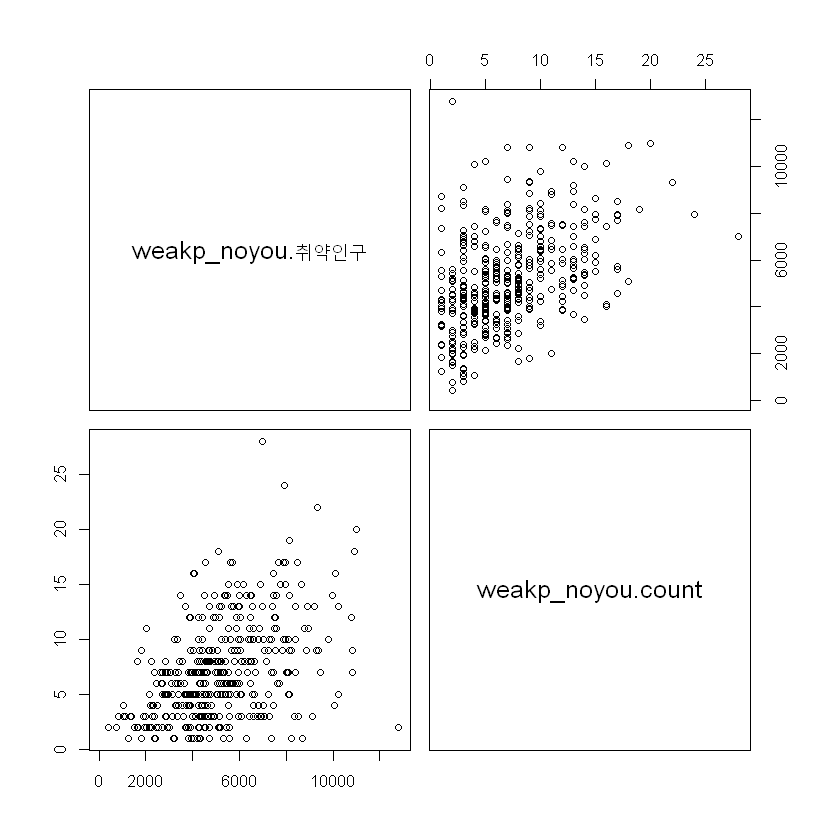

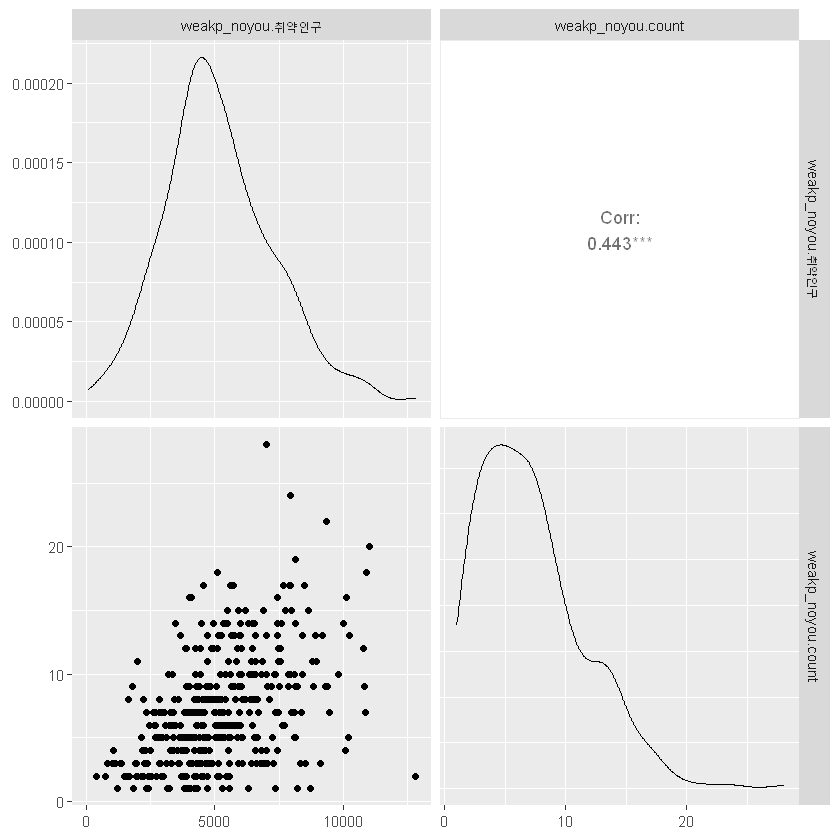

In [11]:
####################노유자 건물 count###############

noyou<- read.csv('C:\\Users\\user\\Desktop\\case2\\동별 노유자시설\\노유자시설 좌표.csv')

str(noyou)

#쓸데없는 세부용도 필터링
table(noyou$세부용도명)
noyou <-  noyou%>%filter(!세부용도명 %in% c('골프연습장' , '소매점', '독서실', '골프연습장', '기타제1종근생활시설'))

#행정동코드별 노유자시설 수
noyou_count <- noyou%>%group_by(name, code)%>%summarise(count = n())

write.csv(noyou, 'C:\\Users\\user\\Desktop\\case2\\동별 노유자시설\\동별 노유자시설 개수.csv')

#행정동코드로 조인
weakp_noyou <- left_join(total_weakp, noyou_count, by = 'code')

cor.test(weakp_noyou$count, weakp_noyou$취약인구)
#상관관계 테스트

pairs(data.frame(weakp_noyou$취약인구, weakp_noyou$count),
      pch = 21, bg = unclass(weakp_noyou$name))

ggpairs(data.frame(weakp_noyou$취약인구, weakp_noyou$count))

### 필요한 취약인구 컬럼 추출 

In [13]:
#모두 total_weakp의 동순으로 이루어져 있음

a <- data.frame(total_weakp$name, total_weakp$code, weakp_child_sec$count,  weakp_noyou$count, total_weakp$취약인구)

nrow(a)
sum(is.na(a))
str(a)

na_a <- na.omit(a)
str(na_a)
nrow(na_a)

write.csv(na_a, 'C:\\Users\\user\\Desktop\\case2\\회귀분석데이터.csv')

[1] 427

[1] 55

'data.frame':	427 obs. of  5 variables:
 $ total_weakp.name     : chr  "소공동" "회현동" "명동" "필동" ...
 $ total_weakp.code     : int  1102052 1102054 1102055 1102057 1102058 1102059 1102060 NA NA NA ...
 $ weakp_child_sec.count: num  2 4 2 1 3 1 NA NA NA NA ...
 $ weakp_noyou.count    : int  2 2 3 4 3 3 NA NA NA NA ...
 $ total_weakp.취약인구 : int  413 1682 828 1055 1020 1330 560 1692 3234 4901 ...
'data.frame':	392 obs. of  5 variables:
 $ total_weakp.name     : chr  "소공동" "회현동" "명동" "필동" ...
 $ total_weakp.code     : int  1102052 1102054 1102055 1102057 1102058 1102059 1102065 1102067 1102068 1111051 ...
 $ weakp_child_sec.count: num  2 4 2 1 3 1 1 3 1 4 ...
 $ weakp_noyou.count    : int  2 2 3 4 3 3 7 2 3 6 ...
 $ total_weakp.취약인구 : int  413 1682 828 1055 1020 1330 2348 2725 3133 5430 ...
 - attr(*, "na.action")= 'omit' Named int [1:35] 7 8 9 10 11 13 19 61 63 70 ...
  ..- attr(*, "names")= chr [1:35] "7" "8" "9" "10" ...


[1] 392

### 가중치 점수화 및 가중치 TOP20 역 도출 


	Pearson's product-moment correlation

data:  na_a$weakp_child_sec.count and na_a$weakp_noyou.count
t = 3.925, df = 390, p-value = 0.0001025
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09777456 0.28841461
sample estimates:
     cor 
0.194935 


Start:  AIC=-1555.54
normalize(na_a$total_weakp.취약인구) ~ na_a$weakp_child_sec.count + 
    na_a$weakp_noyou.count

                             Df Sum of Sq    RSS     AIC
<none>                                    7.2991 -1555.5
- na_a$weakp_child_sec.count  1    1.2214 8.5204 -1496.9
- na_a$weakp_noyou.count      1    1.4733 8.7723 -1485.5



Call:
lm(formula = normalize(na_a$total_weakp.취약인구) ~ na_a$weakp_child_sec.count + 
    na_a$weakp_noyou.count, data = na_a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34290 -0.08881 -0.01364  0.07702  0.57113 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.195966   0.016253  12.058  < 2e-16 ***
na_a$weakp_child_sec.count 0.022721   0.002816   8.068 8.96e-15 ***
na_a$weakp_noyou.count     0.014207   0.001603   8.861  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.137 on 389 degrees of freedom
Multiple R-squared:  0.3142,	Adjusted R-squared:  0.3107 
F-statistic: 89.13 on 2 and 389 DF,  p-value: < 2.2e-16


[1] 0.7073696

[1] 0.2328941

'data.frame':	392 obs. of  6 variables:
 $ total_weakp.name     : chr  "소공동" "회현동" "명동" "필동" ...
 $ total_weakp.code     : int  1102052 1102054 1102055 1102057 1102058 1102059 1102065 1102067 1102068 1111051 ...
 $ weakp_child_sec.count: num  2 4 2 1 3 1 1 3 1 4 ...
 $ weakp_noyou.count    : int  2 2 3 4 3 3 7 2 3 6 ...
 $ total_weakp.취약인구 : int  413 1682 828 1055 1020 1330 2348 2725 3133 5430 ...
 $ predicted_value      : num  0.27 0.315 0.284 0.276 0.307 ...


total_weakp.name,total_weakp.code,weakp_child_sec.count,weakp_noyou.count,total_weakp.취약인구,predicted_value
<chr>,<int>,<dbl>,<int>,<int>,<dbl>


'data.frame':	92 obs. of  21 variables:
 $ 역번호                           : int  2552 2553 2548 2550 2551 2814 340 218 4137 2821 ...
 $ 역사명                           : chr  "명일" "고덕" "천호" "길동" ...
 $ 역위도                           : num  37.6 37.6 37.5 37.5 37.5 ...
 $ 역경도                           : num  127 127 127 127 127 ...
 $ day_outflo                       : int  54 11 104 26 25 55 5 99 45 59 ...
 $ day_outf_1                       : num  304 357 3745 389 412 ...
 $ code                             : int  1125053 1125054 1125066 1125074 1125061 1124058 1124066 1124079 1124059 1124069 ...
 $ name                             : chr  "명일1동" "명일2동" "성내2동" "길동" ...
 $ DN                               : int  2544 2544 2557 2551 2546 2582 2576 2583 2562 2563 ...
 $ tem                              : num  25.4 25.4 25.6 25.5 25.5 ...
 $ code_2                           : int  11250 11250 11250 11250 11250 11240 11240 11240 11240 11240 ...
 $ name_2                           : chr  "강동구" "

[1] 92

[1] 10

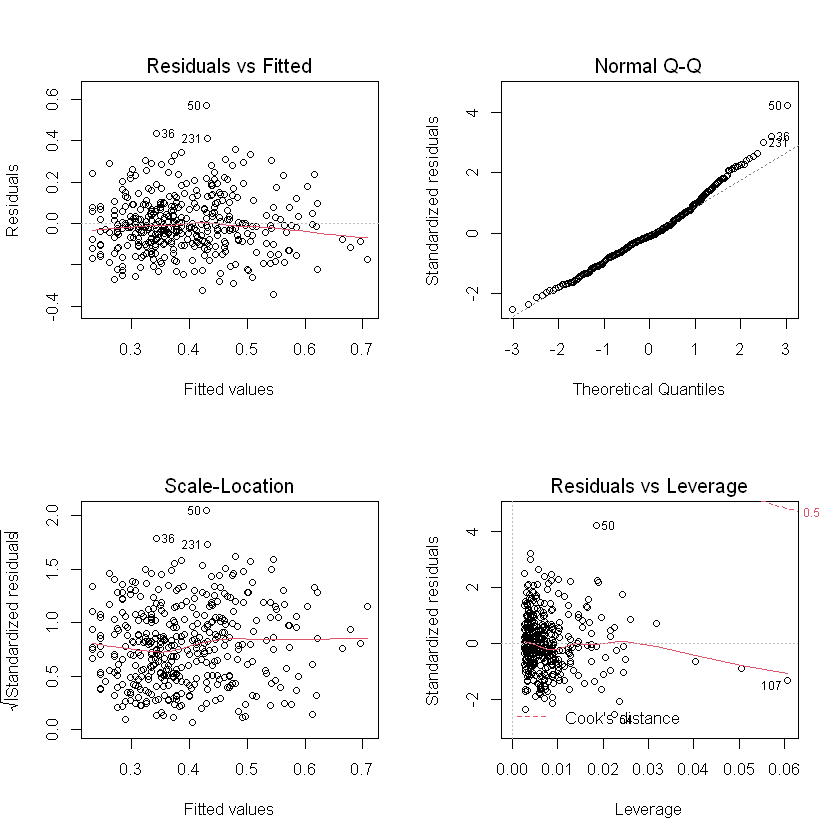

In [14]:
#min-max스케일링
normalize <- function(x) {
  return((x-min(x))/(max(x)-min(x)))
}

cor.test(na_a$weakp_child_sec.count, na_a$weakp_noyou.count)

summary(na_a_lm <- step(lm(normalize(na_a$total_weakp.취약인구) ~ na_a$weakp_child_sec.count + na_a$weakp_noyou.count, na_a)))

par(mfrow = c(2,2))
plot(na_a_lm)

predicted_value <- predict(na_a_lm, na_a[-na_a$total_weakp.취약인구])
max(predicted_value)
min(predicted_value)

case2 <- cbind(na_a, predicted_value)
str(case2)
#############################################################

#QGIS 기준역좌표데이터와 병합하기 위해 다시 이름을 표준화
case2$total_weakp.name <- gsub("[\\/$.@]", '·', case2$total_weakp.name)
case2[str_detect(case2$total_weakp.name,','),]


write.csv(case2, 'C:\\Users\\user\\Desktop\\case2\\case2가중치.csv' )

#QGIS 기준역좌표데이터와 병합한 데이터 불러오기
case2_final <- read.csv('C:\\Users\\user\\Desktop\\case2\\case2_jjin.csv')

str(case2_final)
nrow(case2_final)

sum(is.na(case2_final$case2가중치_predicted_value))

case2_final <- case2_final[!is.na(case2_final$case2가중치_predicted_value),]

#동별 환경데이터를 고안한 가중치공식을 활용하여 점수화 진행
weight <- case2_final$tem + case2_final$hotday + case2_final$mg

weight <- (normalize(weight) + 1) * case2_final$case2가중치_predicted_value

case2_final$weight <- weight

case2_final <- case2_final[!is.na(case2_final$weight),]

write.csv(case2_final, 'C:\\Users\\user\\Desktop\\case2\\case2_찐찐최.csv')

case2_final$rank <- rank(-case2_final$weight)


case2_final_top20 <- case2_final[case2_final$rank <= 20,]
case2_final_top20 <- case2_final_top20[order(case2_final_top20$rank),]

write.csv(case2_final_top20, 'C:\\Users\\user\\Desktop\\case2\\case2_final_top20.csv')